# CycleGAN Explaination

In [1]:
from IPython.display import display, Image # Allows the use of display() for DataFrames

## Background

For a better understanding of how Generative Models work, here is a great video from Stanford for free!
https://www.youtube.com/watch?v=5WoItGTWV54

## This Paper

In this notebook, I will be explaining and demonstrating a paper called "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks".
https://arxiv.org/pdf/1703.10593.pdf

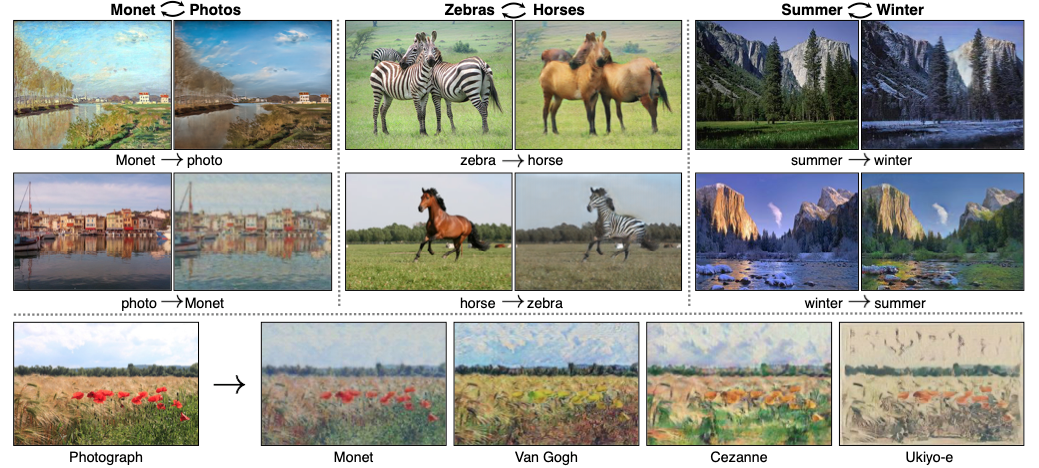

In [2]:
Image(filename='CycleGan_examples.png') 

The goal of this network is to not only create realistically similar images for the discriminator, but also do it in a way that does not lose the form of the original input image. For example, the Horse to Zebra usage could trick the discriminator by just creating a picture of a zebra and having no regard for the original image. To combat this, this network is set to learn a way to do translation mapping of the original image to something the discriminator sees as a viable final product. This allows for us not to lose our original image's form. This is a really powerful technique, because it no longer needs a paired set of input images (in other words you don't need an image of a horse and then a photoshopped horse to look like a zebra) for training. With this, you just need a bunch of images that have the form you want, and a bunch of images with the style you want. Wow.

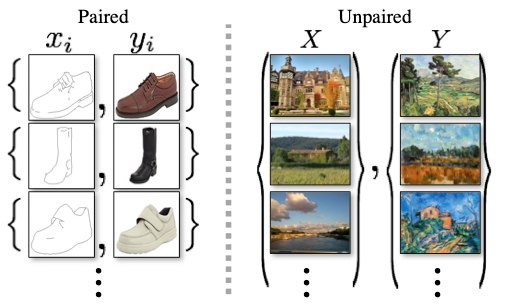

In [3]:
Image(filename='pairedvsunpaired.png')

Above is a visual representation of the difference between Paired and Unpaired images.

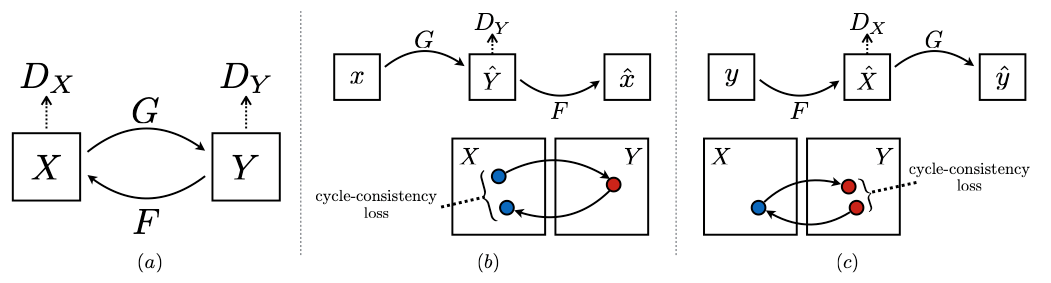

In [4]:
Image(filename='mappingFunction.png')

(a) - The model contains 2 mapping functions G : X -> Y (G is the function that changes input image (X) into output image (Y)) and F : Y -> X (F is the function that changes output image (Y) back into input image (X)). Also included is the 2 discriminators (The algorithms who's job it is to discriminate whether or not the mapping was done correctly) Dx and Dy. Dx encourages G to translate X into outputs indistinguishable from domain Y and vice versa for Dy. In simpler terms, Dy understands what the output image is supposed to look like because it is part of the unpaired input Y and Dx understands what the input image looks like and determines whether the reverse mapping (F) was done correctly.

(b) Shows the cycle-consistency loss after using translation functions G and F. In other words, it calculates the difference between the original input image and the recreated input image after applying the G and F. For example, we take the horse picture, make it a zebra with function G, then make it a horse again with function F then compare that image with the original image to see the change and track how well these mapping functions work.

(c) Shows the inverse of (b), meaning you take the image of a zebra (or whatever the Y input group is) then turn it into a horse (or whatever the X input group is) and back to a zebra and compare with the original Y group image. This is done to make sure the mapping function works properly both ways and gives access to more training parameters. Simpler terms, the algorithm has more to look at so it can train better.

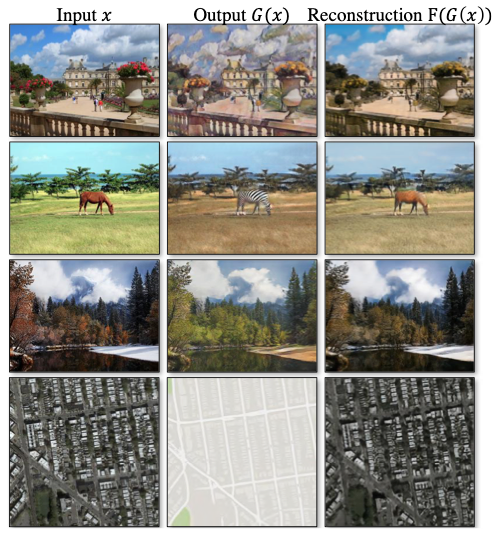

In [5]:
Image(filename='cycles.png')

Here is a data visual of the graph above, but what is happening where?
1. For this, you input 2 groups of images X and Y. In this case that is the **Input x** variable for X and it does not show it, but the Y is the images that are styled like **Output G** but they would NOT look as similar to the X variables as **Output G(x)**
2. Next, you apply the mapping translation function G to the images in **Input X** and that gives you **Output G(x)**
3. This image is then passed into the discriminator Dy from above and it will tell you whether or not **Output G(x)** looks like Y
4. Next, you apply the mapping translation function F to **Output G(x)** and get **Reconstruction F(G(x))** which should look fairly similar to your original **Input x** image
5. This image is then passed into the discriminator Dx from above and it will tell you whether or not **Reconstruction F(G(x))** looks similar enough to **Input x**

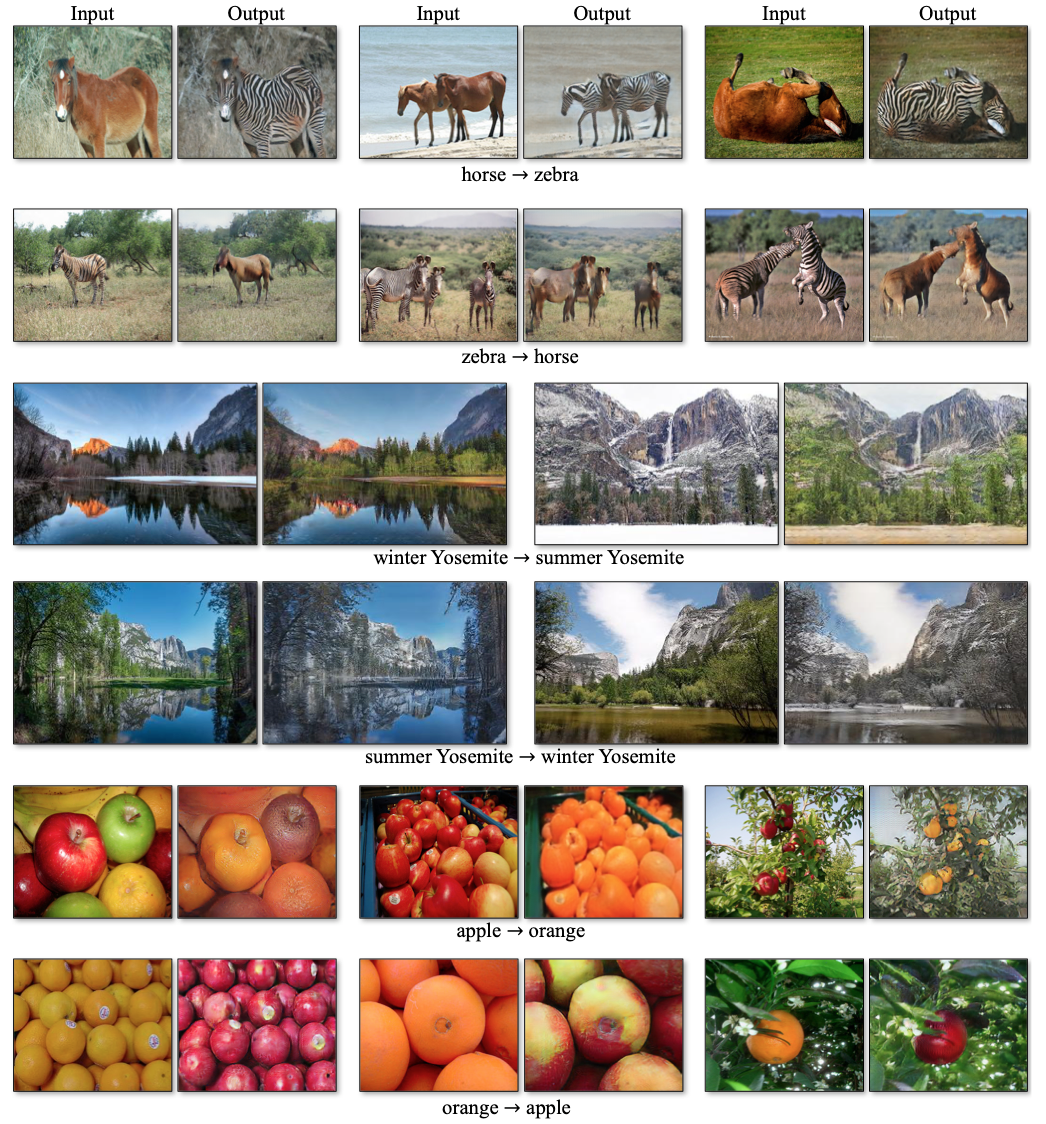

In [6]:
Image(filename='examples.png')

With this 1 process, we are able to create images of all sorts of styles such as shown above.